In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

The chance of winning is 0.25


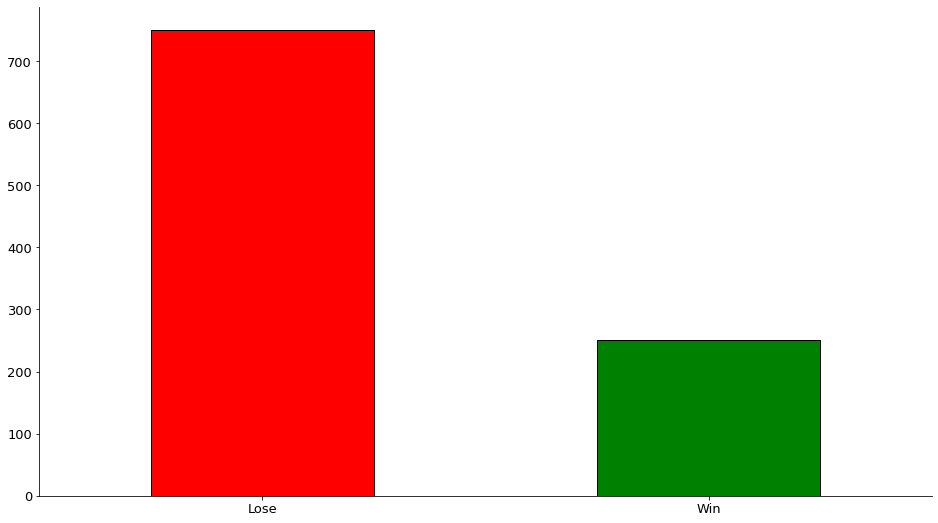

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar(color=("red", "green"))
plt.xticks(rotation=0)
print('The chance of winning is %.2f' % tickets.mean())

In [4]:
n = 25
tickets.sample(n).mean()

0.12

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

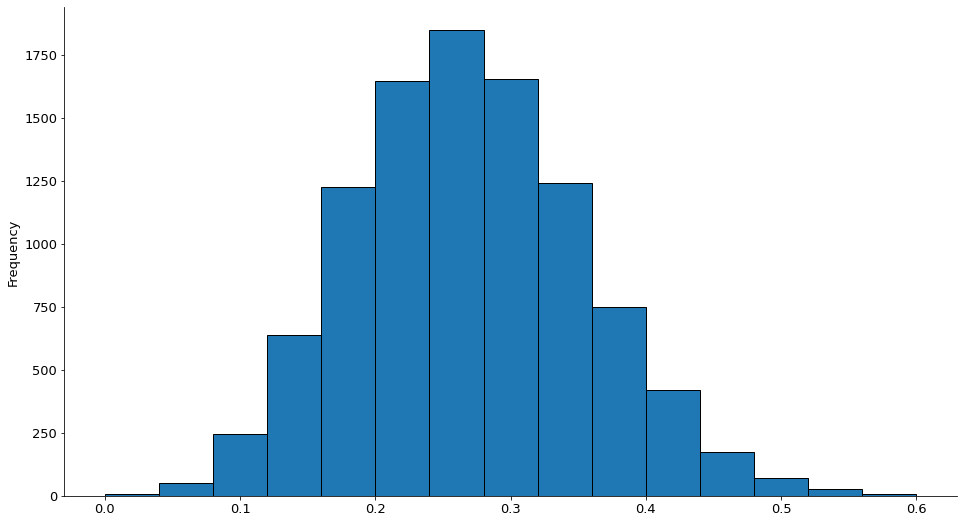

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [7]:
se = math.sqrt((.25 * .75) / n)

In [8]:
se

0.08660254037844387

In [9]:
calculated_winrates.std()

0.08569044351157716

In [10]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

## Has the network latency gone up since we switched internet service providers?

#H0 = latency is present
#H1 = latency is not present

#True Positive = latency is present with new internet provider and there is latency issues
#Type I = latency is present with the new internet provider, but there is no latency
#Type II = latency is not present with new internet provider, and has latency issues
#True Negative = latency is not present with the new internet provider, and there is no latency issues

# Is the website redesign any good?

#H0 = survey concludes website redesign response is > mean of responses on 1 - 5 scale
#H1 = survey concludes website redesign response is <= mean of responses on 1 - 5 scale

#True Positive = website design rating is well above mean
#Type I = website design rating is in between mean and standard deviation and above mean
#Type II = website design rating is in between mean and standard deviation and below mean
#True Negative = website design rating is well below mean

# Is our television ad driving more sales?

#H0 = mean of post ad sales > mean of pre ad sales
#H1 = mean of post ad sales <= mean of pre ad sales

#True Positive = mean of post ad sales is well above mean of pre ad sales
#Type I = mean of post ad sales is in between mean and standard deviation and above mean of pre ad sales
#Type II = mean of post ad sales is in between mean and standard deviation and below mean of pre ad sales
#True Negative = mean of post ad sales is well below mean of pre ad sales

# T-Test Exercises

In [42]:
#Ace Realty

mean1 = 90
mean2 = 100

sd1 = 15
sd2 = 20

sample1 = 40
sample2 = 50

df = sample1 + sample2 - 2

sp = np.sqrt(((sample1 - 1) * sd1**2 + (sample2 - 1) * sd2**2) / (sample1 + sample2 - 2))

error = np.sqrt(sd1**2 / sample1 + sd2**2 / sample2)

t = (mean1 - mean2) / (sp * np.sqrt(1/sample1 + 1/sample2))

p = stats.t(df).cdf(t) * 2

print(t, p)

-2.6252287036468456 0.01020985244923939


In [32]:
mpg = data('mpg')
mpg.head(20)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [13]:
mpg = mpg.assign(mpg_avg = (mpg.cty + mpg.hwy) / 2)

In [19]:
year_99 = mpg[mpg.year == 1999].mpg_avg
year_08 = mpg[mpg.year == 2008].mpg_avg

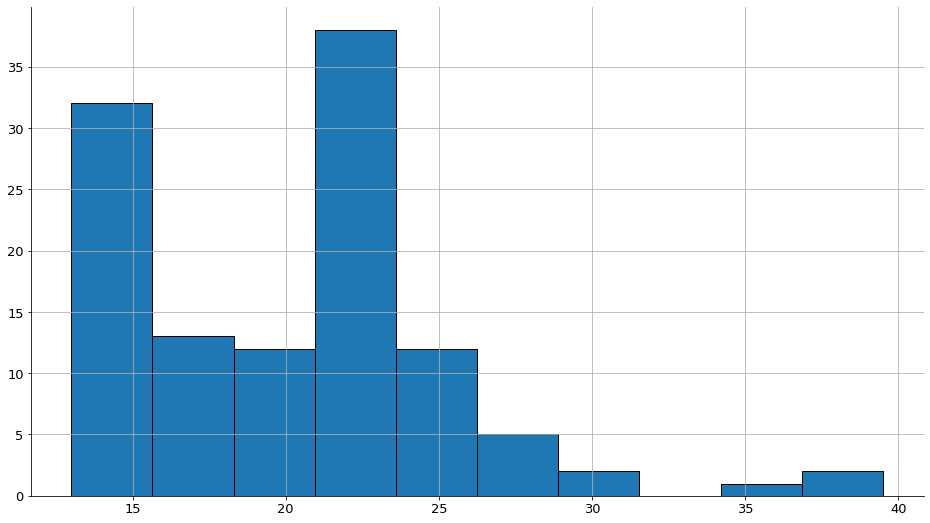

In [20]:
year_99.hist()

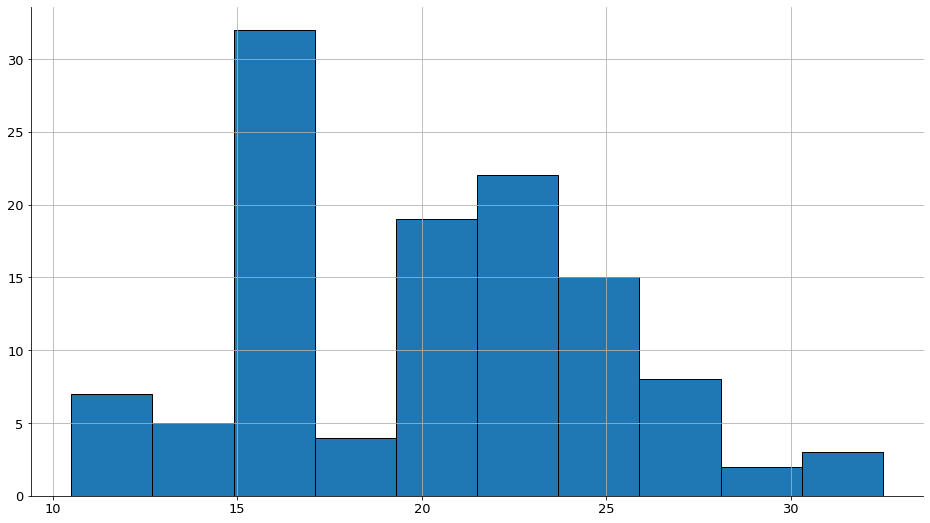

In [21]:
year_08.hist()

In [22]:
year_99.var()

27.122605363984682

In [23]:
year_08.var()

24.097480106100797

In [24]:
t, p = stats.ttest_ind(year_08, year_99, equal_var = True)
print(t, p)

-0.21960177245940962 0.8263744040323578


In [30]:
compact = mpg[mpg['class'] == 'compact'].mpg_avg
all_cars = mpg.mpg_avg

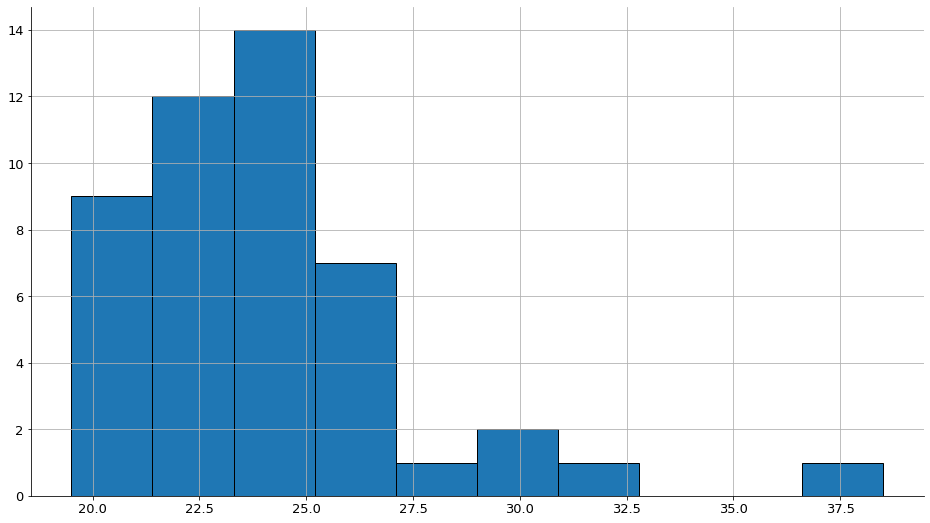

In [33]:
compact.hist()

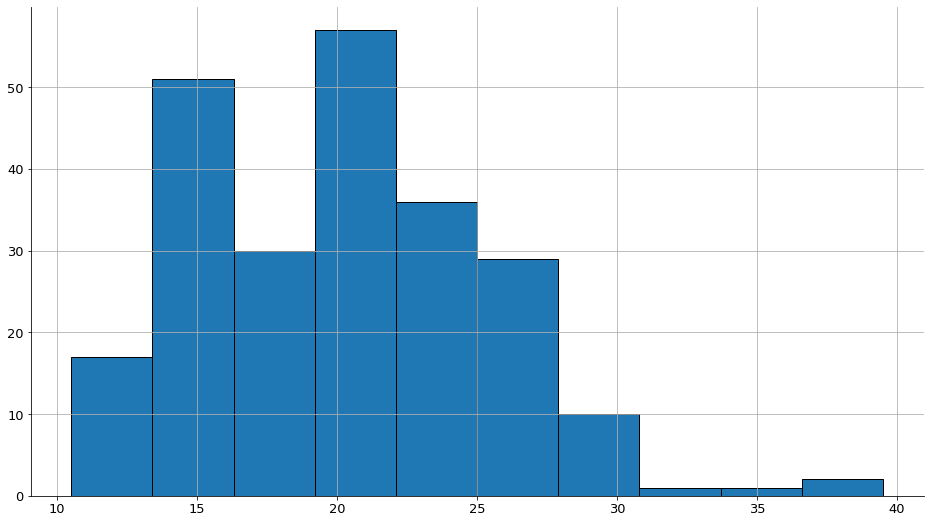

In [34]:
all_cars.hist()

# Correlation Exercises

In [98]:
telco = pd.read_csv ('telco.csv')
telco.dropna(subset=['monthly_charges', 'monthly_tenure', 'total_charges', 'phone_service', 'internet_service'], inplace=True)
telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,partner_dependents,start_date,monthly_charges.1,subscription_type,phone_service_type,internet_service_type,phone_asvalue,internet_asvalue,phone&int_asvalue,Tenure Quartiles
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,...,3.0,11/20/2019,65.6,1 Year,One Line,DSL,1,1,1,8.717230
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,...,0.0,11/20/2019,59.9,Month-to-Month,Two or More Lines,DSL,1,1,1,28.673115
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,...,0.0,5/20/2020,73.9,Month-to-Month,One Line,Fiber Optic,1,1,1,55.244460
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,...,1.0,8/20/2019,98,Month-to-Month,One Line,Fiber Optic,1,1,1,79.341772
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,...,1.0,5/20/2020,83.9,Month-to-Month,One Line,Fiber Optic,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0.0,No,No,1.0,1.0,1.0,Mailed check,55.15,...,0.0,7/20/2019,55.15,1 Year,One Line,DSL,1,1,1,NaN
7039,9992-RRAMN,Male,0.0,Yes,No,2.0,2.0,0.0,Electronic check,85.10,...,1.0,10/20/2018,85.1,Month-to-Month,Two or More Lines,Fiber Optic,1,1,1,NaN
7040,9992-UJOEL,Male,0.0,No,No,1.0,1.0,0.0,Mailed check,50.30,...,0.0,7/20/2020,50.3,Month-to-Month,One Line,DSL,1,1,1,NaN
7041,9993-LHIEB,Male,0.0,Yes,Yes,1.0,1.0,2.0,Mailed check,67.85,...,3.0,12/20/2014,67.85,2 Year,One Line,DSL,1,1,1,NaN


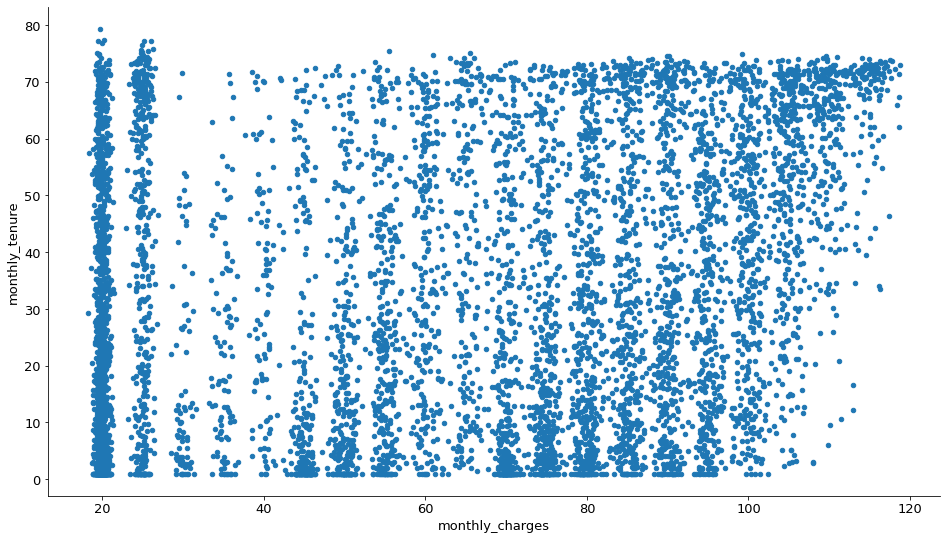

In [99]:
telco.plot.scatter(y='monthly_tenure', x='monthly_charges')

In [100]:
x = telco.monthly_tenure
y = telco.monthly_charges
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.24650161648619134
p = 7.76969165819762e-98


Text(0.5, 1.0, 'no correlation, ($r \\approx 0$)')

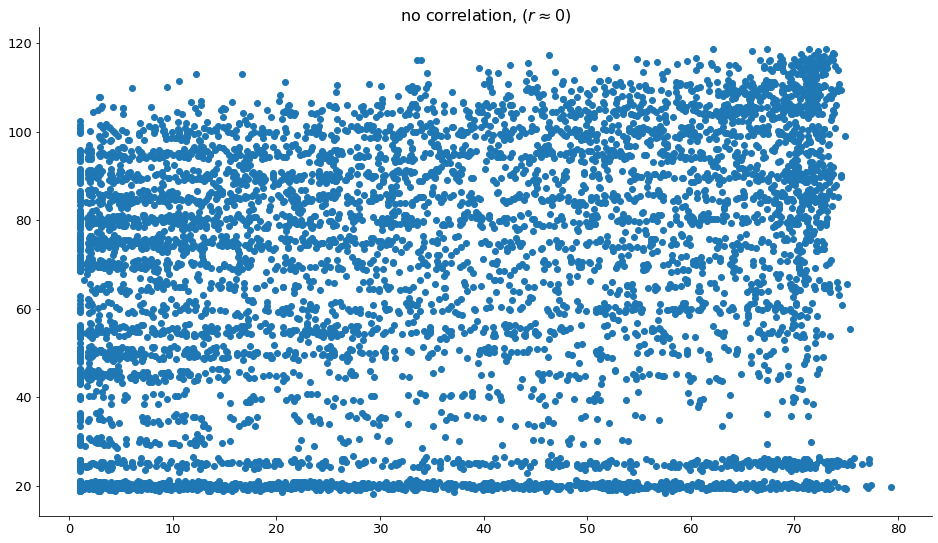

In [101]:
plt.scatter(x, y)
plt.title(r'no correlation, ($r \approx 0$)', size=16)

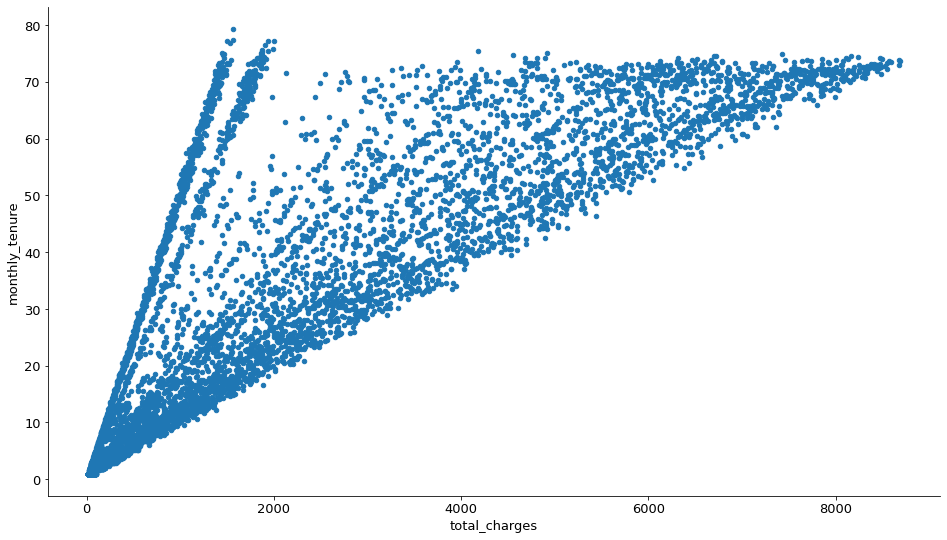

In [102]:
telco.plot.scatter(y='monthly_tenure', x='total_charges')

In [103]:
x = telco.monthly_tenure
y = telco.total_charges
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8261594975326174
p = 0.0


Text(0.5, 1.0, 'Positive Correlation')

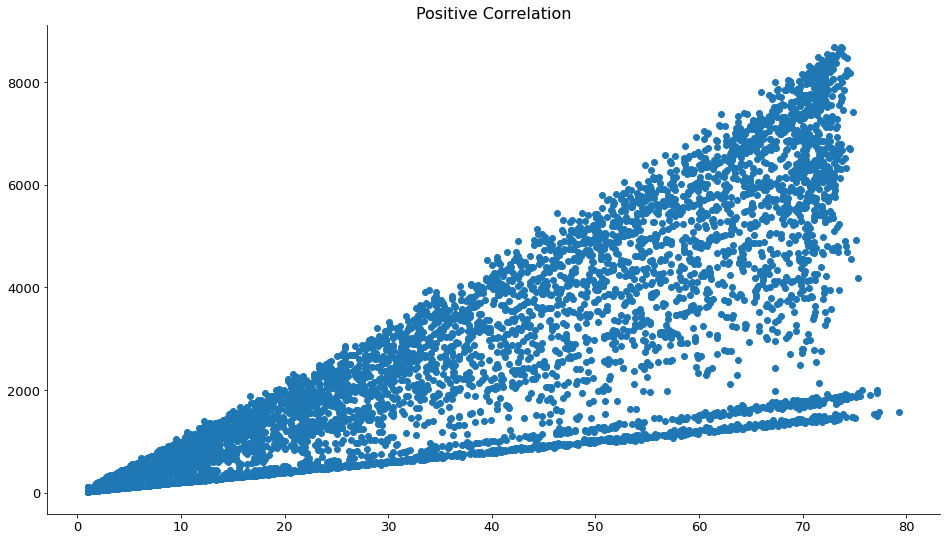

In [104]:
plt.scatter(x, y)
plt.title(r'Positive Correlation', size=16)

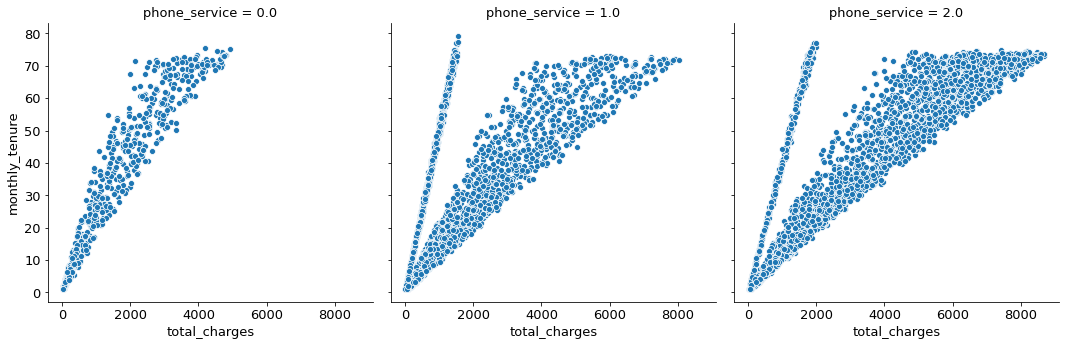

In [105]:
import seaborn as sns
sns.relplot(data=df, y='monthly_tenure', x='total_charges', col= 'phone_service')

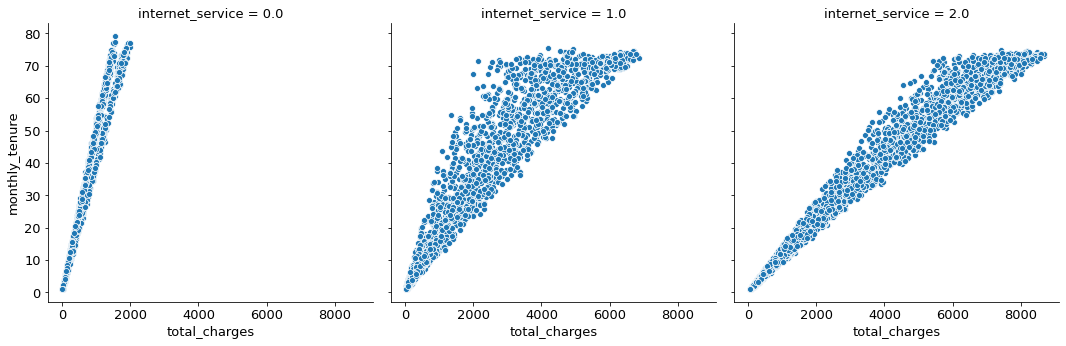

In [106]:
sns.relplot(data=df, y='monthly_tenure', x='total_charges', col= 'internet_service')

In [107]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''

In [108]:
employee_salary = pd.read_sql(query, url)
employee_salary.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


ValueError: If using all scalar values, you must pass an index